<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/Data-Cleaning/Amazon_Products_Sales_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download ikramshah512/amazon-products-sales-dataset-42k-items-2025

Dataset URL: https://www.kaggle.com/datasets/ikramshah512/amazon-products-sales-dataset-42k-items-2025
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
  0% 0.00/7.71M [00:00<?, ?B/s]
100% 7.71M/7.71M [00:00<00:00, 592MB/s]


In [3]:
!unzip /content/amazon-products-sales-dataset-42k-items-2025.zip

Archive:  /content/amazon-products-sales-dataset-42k-items-2025.zip
  inflating: amazon_products_sales_data_cleaned.csv  
  inflating: amazon_products_sales_data_uncleaned.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_main = pd.read_csv("/content/amazon_products_sales_data_uncleaned.csv")
df_main

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas...",5.0 out of 5 stars,1,100+ bought in past month,195.99,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,NaN,"FREE delivery Thu, Sep 4Or fastest delivery Tu...",NaN,https://m.media-amazon.com/images/I/51KCB+egEs...,/Elgato-4K-Pro-Internal-Capture/dp/B0DLR3WQWR/...,2025-08-30 19:56:33
42671,"Arlo Essential Spotlight Camera, Wireless Secu...",4.2 out of 5 stars,20,200+ bought in past month,89.99,basic variant price: $25.00 off coupon applied,No Discount,No Badge,Organic,Save $25.00 with coupon,Add to cart,"FREE delivery Thu, Sep 4Or fastest delivery Mo...",NaN,https://m.media-amazon.com/images/I/51jV+o1LZE...,/Arlo-Essential-Spotlight-Camera-Surveillance/...,2025-08-30 19:56:33
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon...",4.3 out of 5 stars,57,50+ bought in past month,899.99,basic variant price: Lowest price in 30 days,"$1,099.99",Save 18%,Organic,No Coupon,Add to cart,"FREE delivery Thu, Sep 4Or fastest delivery We...",NaN,https://m.media-amazon.com/images/I/71ySPkNLkG...,/GIGABYTE-FO32U2-32-3840x2160-240Hz-FreeSync-A...,2025-08-30 19:56:33
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7 out of 5 stars,"7,102",500+ bought in past month,10.39,basic variant price: nan,$15.98,No Badge,Organic,No Coupon,Add to cart,"FREE delivery Thu, Sep 4 on $35 of items shipp...",NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,/Monoprice-XLR-Male-4-Inch-Cable/dp/B001UJEKZ6...,2025-08-30 19:56:33


In [6]:
df = df_main.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [8]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 42675 rows and 16 columns.


In [9]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows in data: {num_duplicates}")

Number of duplicate rows in data: 0


In [10]:
df.isna().sum()

,0
title,0
rating,1024
number_of_reviews,1024
bought_in_last_month,3217
current/discounted_price,11749
price_on_variant,0
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0


In [11]:
df.describe()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
count,42675,41651,41651,39458,30926,42675,42675,42675,42675,42675,28022,30955,3408,42675,40606,42675
unique,8808,31,4413,59,2576,3466,911,12,2,42,1,298,16,8038,40606,1559
top,"Duracell Coppertop 9V Battery, 6 Count (Pack o...",4.6 out of 5 stars,25,100+ bought in past month,29.99,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",Small Business,https://m.media-amazon.com/images/I/51Xr76m2WL...,/Lorex-8-Channel-Security-Outdoor-Cameras/dp/B...,2025-08-21 11:15:31
freq,744,6151,626,8801,825,21031,30364,40814,35664,40727,28022,6189,1341,1461,1,33


Currently, all features are stored as object types, which prevents us from calculating statistics such as sum or standard deviation. However, some columns that appear as strings could in fact be numerical. These should be identified and converted to numeric types to enable meaningful statistical analysis.

# Analysing of the types

##title Feature

In [12]:
df['title']

,title
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch..."
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel..."
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N..."
4,Apple AirTag 4 Pack. Keep Track of and find Yo...
...,...
42670,"Elgato 4K Pro, Internal Capture Card: 8K60 Pas..."
42671,"Arlo Essential Spotlight Camera, Wireless Secu..."
42672,"GIGABYTE - AORUS FO32U2-32"" QD OLED Gaming Mon..."
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...


In [13]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

In [14]:
category_keywords = {
    'Laptops': [
        'laptop', 'notebook', 'macbook', 'chromebook', 'ultrabook', 'acer', 'asus', 'dell', 'lenovo', 'hp', 'core',
        'intel', 'ryzen', 'surface', 'thinkpad', 'ideapad'
    ],
    'Phones': [
        'phone', 'iphone', 'smartphone', 'samsung', 'android', 'galaxy', 'pixel', 'oneplus', 'xiaomi', 'oppo',
        'realme', 'huawei', 'vivo', 'nokia', 'motorola'
    ],
    'Headphones': [
        'headphone', 'headset', 'earphone', 'earbuds', 'airpods', 'beats', 'sony wh', 'wireless buds', 'neckband'
    ],
    'Chargers & Cables': [
        'charger', 'charging', 'cable', 'adapter', 'dock', 'usb c', 'type c', 'lightning', 'power adapter', 'usb cable'
    ],
    'Cameras': [
        'camera', 'dslr', 'mirrorless', 'canon', 'nikon', 'gopro', 'instax', 'webcam', 'camcorder', 'security camera'
    ],
    'Storage': [
        'ssd', 'hard drive', 'memory card', 'flash drive', 'pendrive', 'hdd', 'storage', 'micro sd', 'sd card'
    ],
    'Smart Home': [
        'alexa', 'echo', 'smart plug', 'smart bulb', 'smart home', 'nest', 'homekit', 'smart switch'
    ],
    'TV & Display': [
        'monitor', 'display', 'tv', 'screen', 'projector', 'oled', 'led', 'curved monitor', 'uhd', '4k'
    ],
    'Power & Batteries': [
        'battery', 'power bank', 'rechargeable', 'aa', 'aaa', 'portable power', 'cell'
    ],
    'Networking': [
        'wifi', 'router', 'modem', 'ethernet', 'access point', 'mesh', 'network switch'
    ],
    'Wearables': [
        'smartwatch', 'fitness band', 'fitbit', 'watch', 'garmin', 'amazfit'
    ],
    'Speakers': [
        'speaker', 'soundbar', 'subwoofer', 'bluetooth speaker', 'party speaker', 'home theater'
    ],
    'Printers & Scanners': [
        'printer', 'scanner', 'inkjet', 'laserjet', 'photocopier', 'all in one printer'
    ],
    'Gaming': [
        'gaming console', 'playstation', 'ps5', 'ps4', 'xbox', 'nintendo', 'joystick', 'controller', 'gaming mouse',
        'gaming keyboard', 'gaming chair'
    ],
    'Other Electronics': []
}

In [15]:
def assign_category_simple(title):
    title_clean = clean_text(title)
    for category, keywords in category_keywords.items():
        for kw in keywords:
            if kw in title_clean:
                return category
    return 'Other Electronics'

In [16]:
df['category'] = df['title'].apply(assign_category_simple)

df['category'].value_counts()

,count
category,
Other Electronics,8755
Laptops,8693
Phones,6563
Cameras,3677
Power & Batteries,2877
TV & Display,2630
Chargers & Cables,1833
Storage,1630
Speakers,1345


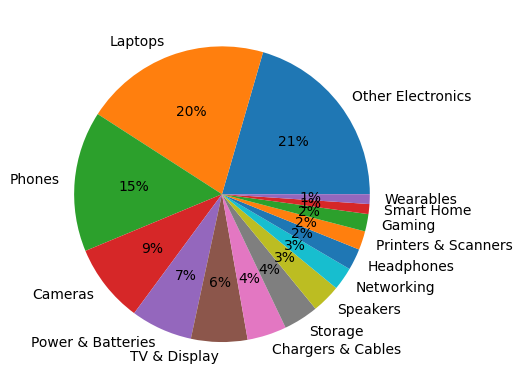

In [17]:
category_counts = df['category'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct="%1.f%%")
plt.show()

In [18]:
del df['title']

## rating Feature

In [19]:
df["rating"].value_counts()

,count
rating,
4.6 out of 5 stars,6151
4.4 out of 5 stars,5525
4.5 out of 5 stars,5359
4.7 out of 5 stars,4664
4.8 out of 5 stars,4230
4.3 out of 5 stars,2927
4.2 out of 5 stars,2837
4.1 out of 5 stars,1959
4.0 out of 5 stars,1465


In [20]:
df["rating"].map(lambda rate: str(rate)[3:]).value_counts()

,count
rating,
out of 5 stars,41651
,1024


The rating feature contains values ending with ‘out of 5 stars,’ which prevents direct conversion into numeric form. To address this issue, the text component will be removed, leaving only the numeric values. Additionally, 1,024 entries in the dataset are null.

In [21]:
df["rating"] = df["rating"].astype(str).str.extract(r"(\d+\.\d+)").astype(np.float32)
print(f"Type: {df['rating'].dtype}, Data: {df['rating']}")

Type: float32, Data: 0        4.6
1        4.3
2        4.6
3        4.6
4        4.8
        ... 
42670    5.0
42671    4.2
42672    4.3
42673    4.7
42674    4.4
Name: rating, Length: 42675, dtype: float32


##number_of_reviews Feature

In [22]:
df['number_of_reviews']

,number_of_reviews
0,375
1,"2,457"
2,"3,044"
3,"35,882"
4,"28,988"
...,...
42670,1
42671,20
42672,57
42673,"7,102"


Several numeric fields are formatted with thousands separators (e.g., ‘7,102’ instead of ‘7102’) and stored as strings. This formatting blocks numeric conversion. We will remove the commas and cast these fields to numeric to enable accurate calculations.

In [23]:
df['number_of_reviews'] = (
    df['number_of_reviews']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace('nan', pd.NA)
    .astype('Int32')
)

## price_on_variant Feature

In [24]:
df['price_on_variant']

,price_on_variant
0,basic variant price: 2.4GHz
1,basic variant price: nan
2,basic variant price: nan
3,basic variant price: $162.24
4,basic variant price: $72.74
...,...
42670,basic variant price: nan
42671,basic variant price: $25.00 off coupon applied
42672,basic variant price: Lowest price in 30 days
42673,basic variant price: nan


In [25]:
df['price_on_variant'] = df['price_on_variant'].str.split(":").str.get(1)
df['price_on_variant'].head()

,price_on_variant
0,2.4GHz
1,nan
2,nan
3,$162.24
4,$72.74


To capture the price, we first extract the part of the string that comes after the colon (:). This ensures we isolate the section containing price-related information.

In [26]:
df.loc[~df['price_on_variant'].str.contains(r'\$', na=False), 'price_on_variant'] = np.nan
df['price_on_variant'].head()

,price_on_variant
0,NaN
1,NaN
2,NaN
3,$162.24
4,$72.74


If the extracted string does not contain a dollar sign ($), the value should be treated as null, as it cannot represent a valid price.

In [27]:
df['price_on_variant'] = df['price_on_variant'].str.strip().str.split(" ").str.get(0)
df['price_on_variant'].head()

,price_on_variant
0,NaN
1,NaN
2,NaN
3,$162.24
4,$72.74


Finally, to obtain the numerical price, we split the text by spaces and select the first element. This step isolates the actual price from any extra information.

## bought_in_last_month	Feature

In [28]:
df['bought_in_last_month']

,bought_in_last_month
0,300+ bought in past month
1,6K+ bought in past month
2,2K+ bought in past month
3,10K+ bought in past month
4,10K+ bought in past month
...,...
42670,100+ bought in past month
42671,200+ bought in past month
42672,50+ bought in past month
42673,500+ bought in past month


Some numbers in the dataset appear as ‘500+’ or ‘10k+.’ We don’t need the ‘+,’ and the ‘k’ should be replaced by multiplying the number by 1,000. Once we do that, we can convert these values into actual numbers.

In [29]:
def convert_to_number(num):
    if pd.isna(num):
        return None

    num_str = str(num).upper().replace("+", "").strip()

    multiplier = 1
    if "K" in num_str:
        multiplier = 1000
        num_str = num_str.replace("K", "")

    number_part = num_str.split()[0]

    try:
        return int(float(number_part) * multiplier)
    except ValueError:
        return None

df['bought_in_last_month'] = df['bought_in_last_month'].map(convert_to_number)
print(f"Type: {df['bought_in_last_month'].dtype}, Data: {df['bought_in_last_month']}")

Type: float64, Data: 0          300.0
1         6000.0
2         2000.0
3        10000.0
4        10000.0
          ...   
42670      100.0
42671      200.0
42672       50.0
42673      500.0
42674       50.0
Name: bought_in_last_month, Length: 42675, dtype: float64


## current/discounted_price Feature

In [30]:
df['current/discounted_price']

,current/discounted_price
0,89.68
1,9.99
2,314.00
3,NaN
4,NaN
...,...
42670,195.99
42671,89.99
42672,899.99
42673,10.39


In [31]:
df['current/discounted_price'] = (
    df['current/discounted_price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace('nan', None)
)

df['current/discounted_price'] = (
    pd.to_numeric(df['current/discounted_price'], errors='coerce')
    .round(2)
)

## listed_price feature

In [32]:
df['listed_price']

,listed_price
0,$159.00
1,$15.99
2,$349.00
3,No Discount
4,No Discount
...,...
42670,No Discount
42671,No Discount
42672,"$1,099.99"
42673,$15.98


In this column, currency symbols (‘$’) and commas (‘,’) should be removed to standardize the numeric values. Additionally, entries labeled as ‘No Discount’ will be replaced with 0, allowing the column to be fully converted into numeric format for analysis.

In [33]:
df['listed_price'] = (
    df['listed_price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .replace('No Discount', '0')
    .astype(float)
)
print(f"Type: {df['listed_price'].dtype}, Data: {df['listed_price']}")

Type: float64, Data: 0         159.00
1          15.99
2         349.00
3           0.00
4           0.00
          ...   
42670       0.00
42671       0.00
42672    1099.99
42673      15.98
42674     499.99
Name: listed_price, Length: 42675, dtype: float64


## buy_box_availability Feature

In [34]:
df['buy_box_availability'].value_counts()

,count
buy_box_availability,
Add to cart,28022


In [35]:
df.loc[:, 'buy_box_availability'] = df['buy_box_availability'].map(lambda x: 0 if pd.isna(x) else 1)

In [36]:
df['buy_box_availability'].value_counts()

,count
buy_box_availability,
1,28022
0,14653


## collected_at feature

In [37]:
df['collected_at'] = pd.to_datetime(df['collected_at'])

#Handling with data skewness and outliers

In [38]:
df.isna().sum()

,0
rating,1024
number_of_reviews,1024
bought_in_last_month,10511
current/discounted_price,11749
price_on_variant,22604
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0
buy_box_availability,0


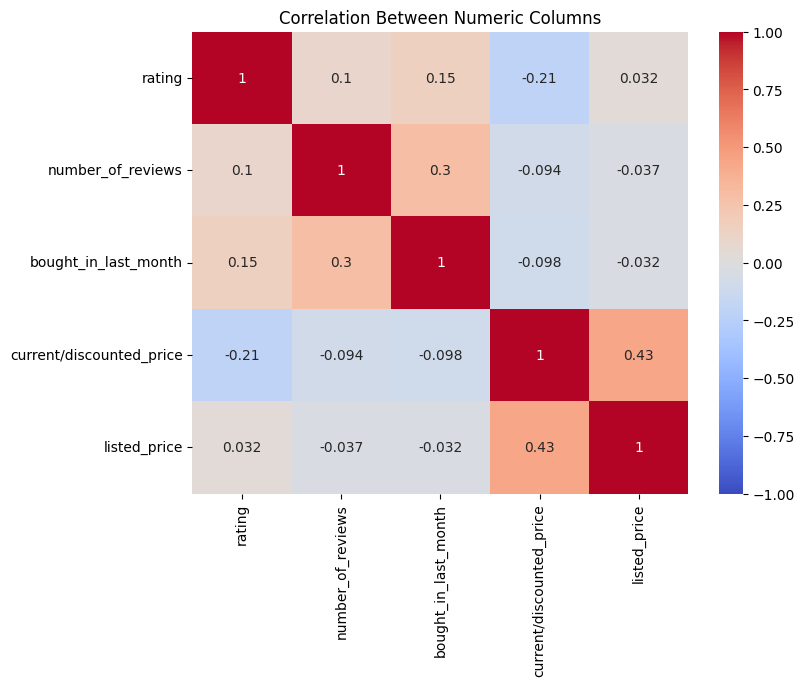

In [39]:
import seaborn as sns

corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Numeric Columns')
plt.show()

In [40]:
def diagnose_outliers_iqr(column, df, x = 1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - x * IQR
    upper_bound = Q3 + x * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"--- IQR Diagnosis for {column} ---")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers detected: {len(outliers)}")

    print(f"95th_percentile: {df[column].quantile(0.95)}")
    print(f"99th_percentile: {df[column].quantile(0.99)}")
    return

In [41]:
def remove_outliers_iqr(column, df, x = 1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - x * IQR
    upper_bound = Q3 + x * IQR

    df_clean = df[(df[column].isna()) |
              ((df[column] >= lower_bound) & (df[column] <= upper_bound))]

    print(f"--- IQR Outlier Removal for {column} ---")
    print(f"Rows before: {len(df)}, Rows after: {len(df_clean)}")

    return df_clean

## rating Feature

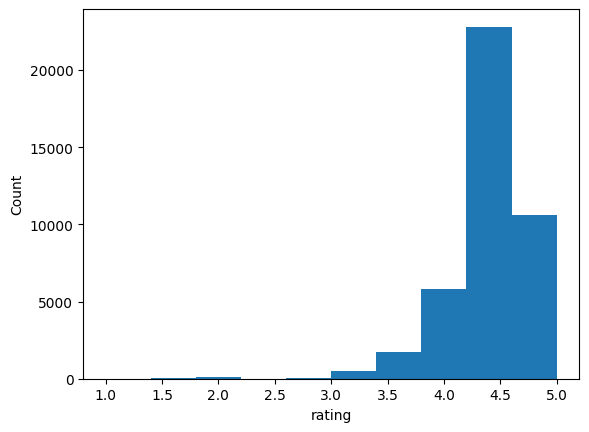

In [42]:
def plot_hist(column, df, title="", xlabel="", ylabel="", bins=10):
    plt.hist(df[column], bins=bins)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_hist("rating", df, xlabel="rating", ylabel="Count")

In the histogram, we observe negative skewness, indicating that the data are skewed to the left. To address this, we could consider applying transformations such as square, cube, or yeo-johnson method, or use techniques like binning to normalize the distribution. Alternatively, robust statistical methods that are less sensitive to skewness could be employed. And also we can see that there are some outliers there, let's go deeper ..

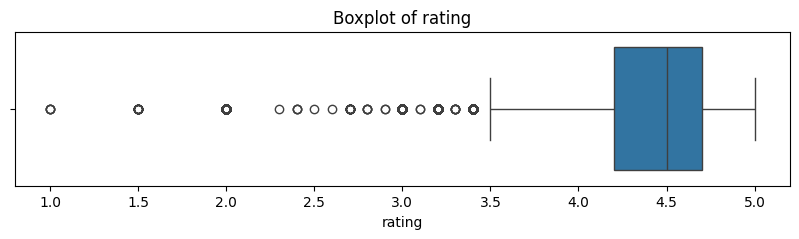

In [43]:
def boxplot_vizual(column, df):
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[column], orient='h')
    plt.title(f"Boxplot of {column}")
    plt.show()

boxplot_vizual("rating", df)

In [44]:
diagnose_outliers_iqr('rating', df)

--- IQR Diagnosis for rating ---
Q1: 4.199999809265137, Q3: 4.699999809265137, IQR: 0.5
Lower Bound: 3.4499998092651367, Upper Bound: 5.449999809265137
Number of outliers detected: 924
95th_percentile: 4.800000190734863
99th_percentile: 5.0


In [45]:
outlier_count_rating = df[df['rating'] < 3].shape[0]
print(f"If lower bound is 3, the outlier count will be {outlier_count_rating}")

If lower bound is 3, the outlier count will be 189


In [46]:
df = df[(df['rating'].isna()) | (df['rating'] > 3)].copy()

In [47]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df.loc[:, 'rating'] = pt.fit_transform(df[['rating']])

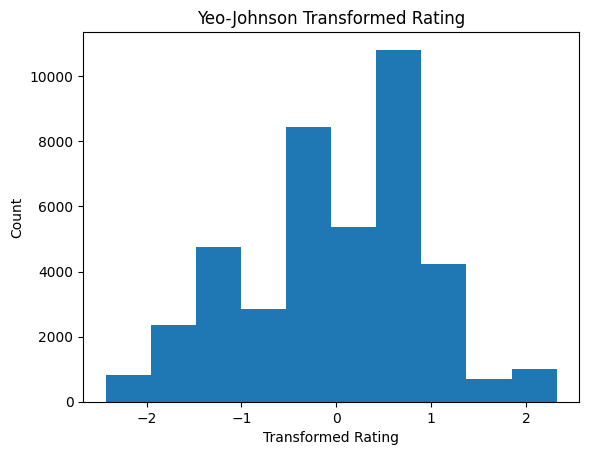

In [48]:
plt.hist(df['rating'], bins=10)
plt.title("Yeo-Johnson Transformed Rating")
plt.xlabel("Transformed Rating")
plt.ylabel("Count")
plt.show()

## bought_in_last_month Feature

In [49]:
df['bought_in_last_month']

,bought_in_last_month
0,300.0
1,6000.0
2,2000.0
3,10000.0
4,10000.0
...,...
42670,100.0
42671,200.0
42672,50.0
42673,500.0


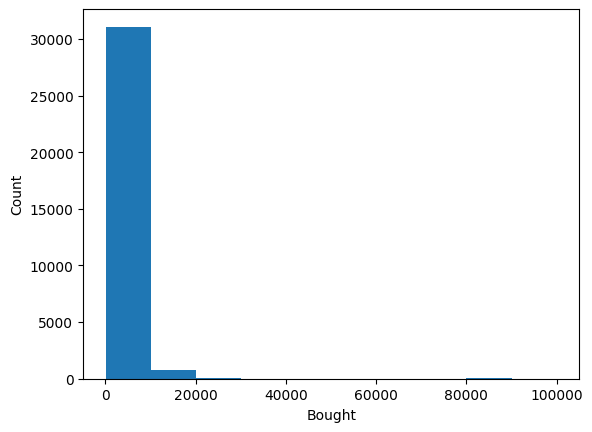

In [50]:
plot_hist("bought_in_last_month", df, xlabel="Bought", ylabel="Count")

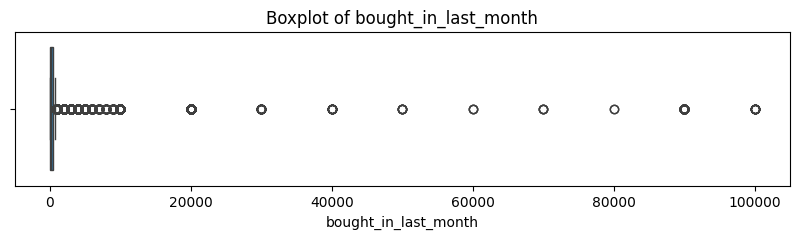

In [51]:
boxplot_vizual("bought_in_last_month", df)

In [52]:
diagnose_outliers_iqr("bought_in_last_month", df, x=1.5)

--- IQR Diagnosis for bought_in_last_month ---
Q1: 100.0, Q3: 400.0, IQR: 300.0
Lower Bound: -350.0, Upper Bound: 850.0
Number of outliers detected: 4511
95th_percentile: 4000.0
99th_percentile: 20000.0


In [53]:
print(f"If upper bound is 20k, the outlier count will be {df[df['bought_in_last_month'] > 20_000].shape[0]}")

If upper bound is 20k, the outlier count will be 162


In [54]:
print(f"If upper bound is 4k, the outlier count will be {df[df['bought_in_last_month'] > 4_000].shape[0]}")

If upper bound is 4k, the outlier count will be 1493


In [55]:
df = df[(df['bought_in_last_month'].isna()) | (df['bought_in_last_month'] <= 20_000)]

In [56]:
df.loc[:, 'bought_in_last_month'] = df['bought_in_last_month'].clip(lower=None, upper=4_000)

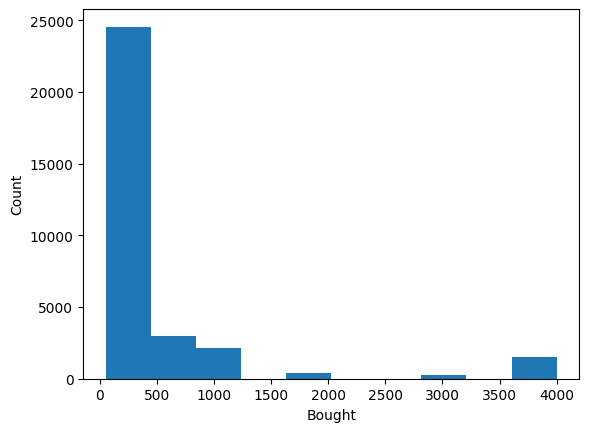

In [57]:
plot_hist("bought_in_last_month", df, xlabel="Bought", ylabel="Count")

The data exhibit right skewness, meaning most values are clustered at the lower end while a few very large values stretch the distribution to the right. To address this imbalance, a logarithmic transformation can be applied, which compresses higher values and helps normalize the distribution.

In [58]:
df.loc[:, 'bought_in_last_month'] = np.log(df['bought_in_last_month'])

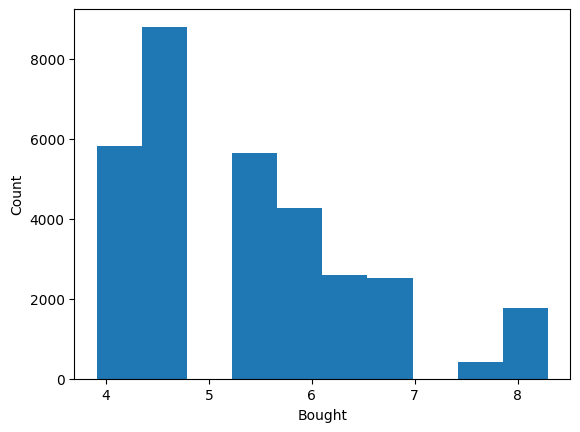

In [59]:
plot_hist("bought_in_last_month", df, xlabel="Bought", ylabel="Count")

## number_of_reviews Feature

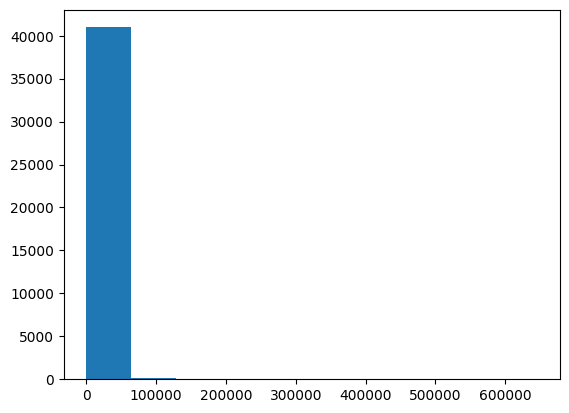

In [60]:
plot_hist('number_of_reviews', df)

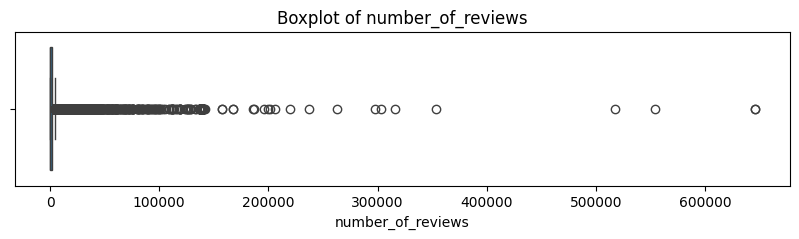

In [61]:
boxplot_vizual("number_of_reviews", df)

In [62]:
diagnose_outliers_iqr('number_of_reviews', df)

--- IQR Diagnosis for number_of_reviews ---
Q1: 84, Q3: 1886, IQR: 1802
Lower Bound: -2619.0, Upper Bound: 4589.0
Number of outliers detected: 5702
95th_percentile: 12147
99th_percentile: 36499


In [63]:
upper = df['number_of_reviews'].quantile(0.99)
print(f"Outlier count when upper bound is {upper:,.0f}: {(df['number_of_reviews'] > upper).sum()}")

Outlier count when upper bound is 36,499: 301


In [64]:
df = df[(df['number_of_reviews'].isna()) | (df['number_of_reviews'] < upper)].copy()

In [65]:
df.loc[:, 'number_of_reviews'] = df['number_of_reviews'].clip(lower=None, upper=12147)

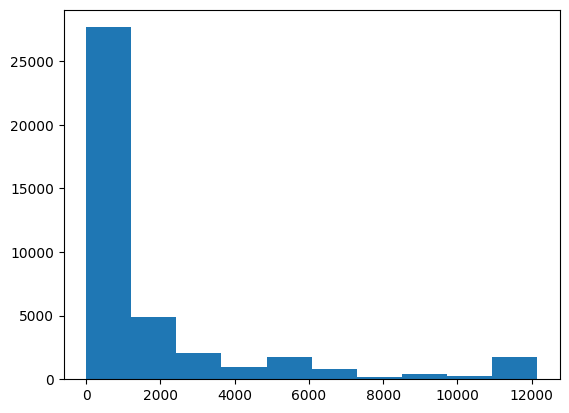

In [66]:
plot_hist('number_of_reviews', df)

In [67]:
df['number_of_reviews'] = np.log(df['number_of_reviews'])

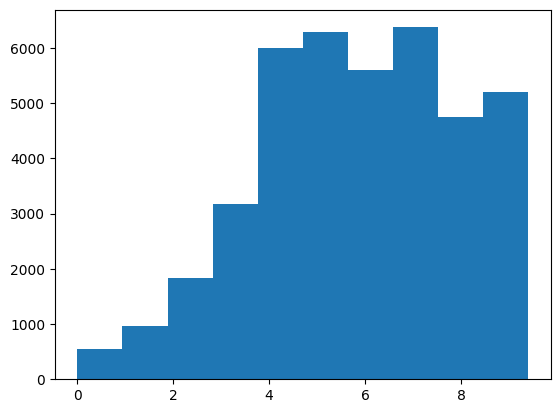

In [68]:
plot_hist('number_of_reviews', df)

## current/discounted_price Feature

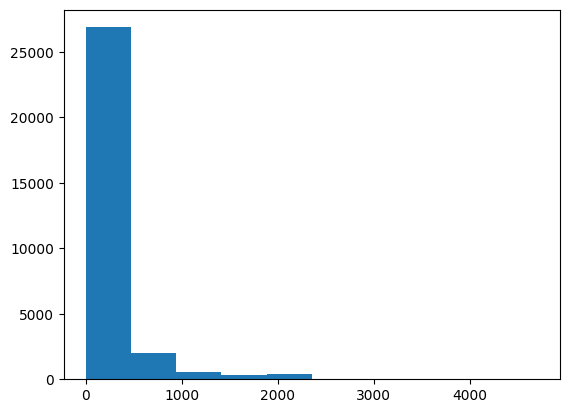

In [69]:
plot_hist("current/discounted_price", df)

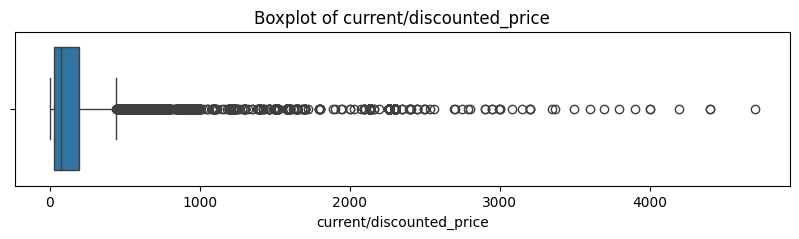

In [70]:
boxplot_vizual("current/discounted_price", df)

In [71]:
diagnose_outliers_iqr("current/discounted_price", df, x = 1.5)

--- IQR Diagnosis for current/discounted_price ---
Q1: 27.49, Q3: 193.655, IQR: 166.165
Lower Bound: -221.7575, Upper Bound: 442.90250000000003
Number of outliers detected: 3470
95th_percentile: 849.0
99th_percentile: 2259.0


In [72]:
df = df[(df["current/discounted_price"].isna()) | (df["current/discounted_price"] < 2259.0)]

In [73]:
df.loc[:, 'current/discounted_price'] = df['current/discounted_price'].clip(lower=None, upper=850)

## price_on_variant Feature

In [74]:
del df['price_on_variant']

## listed_price

In [75]:
df['listed_price']

,listed_price
0,159.00
1,15.99
2,349.00
3,0.00
4,0.00
...,...
42670,0.00
42671,0.00
42672,1099.99
42673,15.98


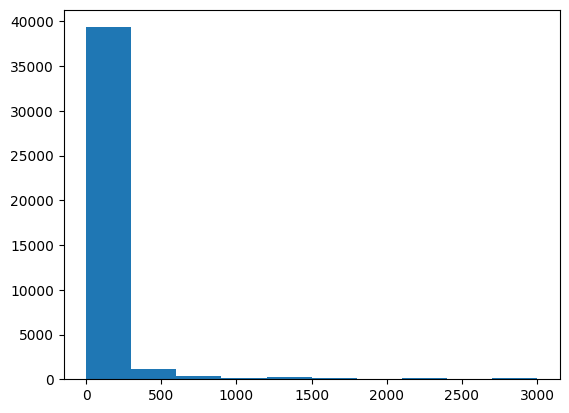

In [76]:
plot_hist('listed_price', df)

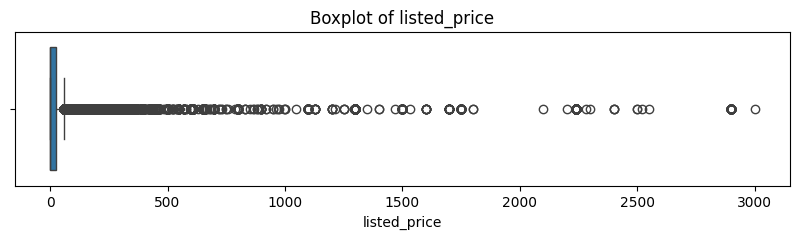

In [77]:
boxplot_vizual('listed_price', df)

In [78]:
diagnose_outliers_iqr('listed_price', df)

--- IQR Diagnosis for listed_price ---
Q1: 0.0, Q3: 23.26, IQR: 23.26
Lower Bound: -34.89, Upper Bound: 58.150000000000006
Number of outliers detected: 6446
95th_percentile: 310.43099999999816
99th_percentile: 1299.0


In [79]:
df = df[(df["listed_price"].isna()) | (df["listed_price"] < 500)]

In [80]:
df.loc[:, 'listed_price'] = df['listed_price'].clip(lower=None, upper=310)

In [81]:
df.loc[:, 'listed_price'] = np.log1p(df['listed_price'])

In [82]:
df['listed_price'].min()

0.0

#Handling with Missing Data

In [83]:
df.isna().sum()

,0
rating,881
number_of_reviews,881
bought_in_last_month,9585
current/discounted_price,11513
listed_price,0
is_best_seller,0
is_sponsored,0
is_couponed,0
buy_box_availability,0
delivery_details,11476


In [84]:
df = df.drop(columns=['image_url', 'product_url', 'collected_at', "delivery_details", 'sustainability_badges'])

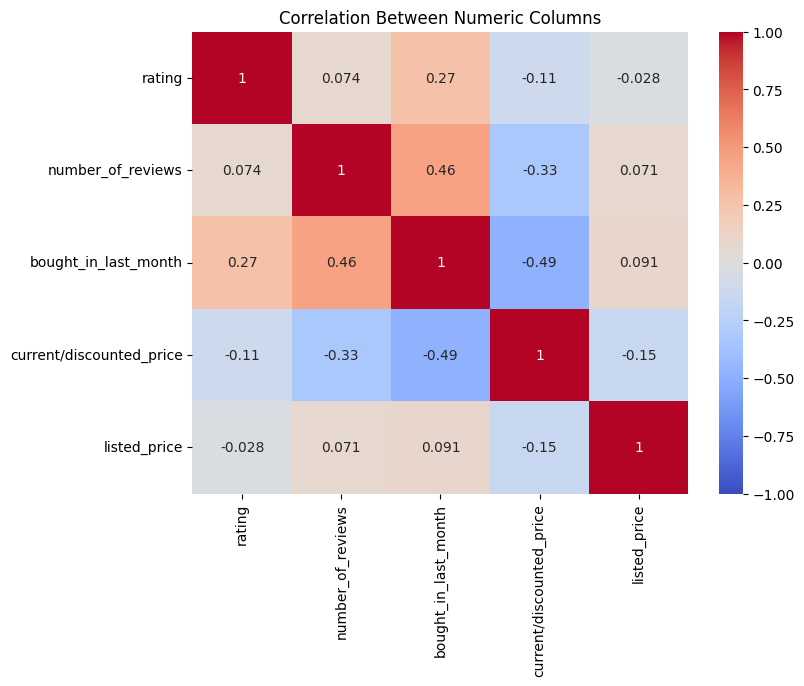

In [85]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Numeric Columns')
plt.show()

## Rating and number_of_reviews Features

In [86]:
df[df['rating'].isna()]['number_of_reviews'].value_counts()

,count
number_of_reviews,


There is a strong correlation between the two features: when one contains a null value, the other is also null. In such cases, imputing the missing values may not provide meaningful results. Therefore, it would be more appropriate to remove these columns rather than attempt to fill them.

In [87]:
df = df.dropna(subset=['rating'])

## bought_in_last_month, current/discounted_price Features

In [88]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

In [89]:
# Select only numeric columns that include missing values
cols_with_na = ["bought_in_last_month", "current/discounted_price"]
numeric_df = df[cols_with_na + ["number_of_reviews"]].copy()

In [90]:
# Save original distributions (before imputation)
before_impute = numeric_df.copy()

# Apply IterativeImputer
imputer = IterativeImputer(random_state=42, max_iter=10)
numeric_imputed = imputer.fit_transform(numeric_df)

# Put back into DataFrame
numeric_imputed = pd.DataFrame(numeric_imputed, columns=numeric_df.columns, index=numeric_df.index)

# Replace in original df
df.loc[:, cols_with_na] = numeric_imputed[cols_with_na]

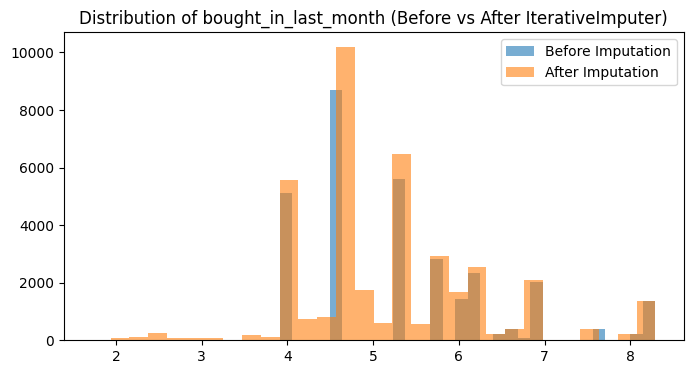

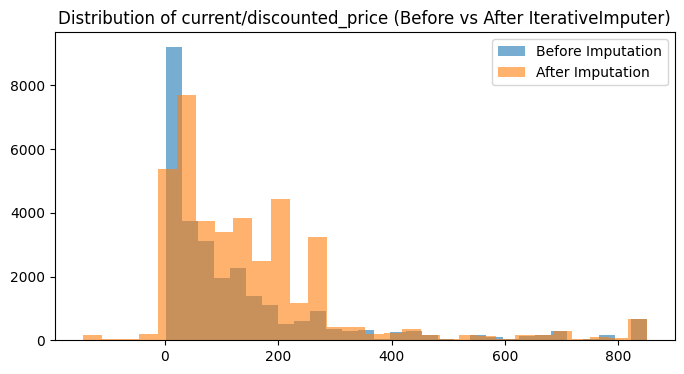

In [91]:
for col in cols_with_na:
    plt.figure(figsize=(8,4))
    plt.hist(before_impute[col].dropna(), bins=30, alpha=0.6, label="Before Imputation")
    plt.hist(numeric_imputed[col], bins=30, alpha=0.6, label="After Imputation")
    plt.title(f"Distribution of {col} (Before vs After IterativeImputer)")
    plt.legend()
    plt.show()

In [92]:
df.rename(columns={
    'rating': 'product_rating',
    'number_of_reviews': 'total_reviews',
    'bought_in_last_month': 'purchased_last_month',
    'current/discounted_price': 'discounted_price',
    'is_couponed': 'has_coupon',
    'buy_box_availability': 'availability',
}, inplace=True)

df.columns

Index(['product_rating', 'total_reviews', 'purchased_last_month',
       'discounted_price', 'listed_price', 'is_best_seller', 'is_sponsored',
       'has_coupon', 'availability', 'category'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39479 entries, 0 to 42674
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_rating        39479 non-null  float32
 1   total_reviews         39479 non-null  Float64
 2   purchased_last_month  39479 non-null  float64
 3   discounted_price      39479 non-null  float64
 4   listed_price          39479 non-null  float64
 5   is_best_seller        39479 non-null  object 
 6   is_sponsored          39479 non-null  object 
 7   has_coupon            39479 non-null  object 
 8   availability          39479 non-null  object 
 9   category              39479 non-null  object 
dtypes: Float64(1), float32(1), float64(3), object(5)
memory usage: 3.2+ MB
